## <center> Аттестация. Практическое задание в Jupyter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/solarpower.csv')
display(df[df['cum_power'] == -1])

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} + x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [34]:
for index, row in df.iterrows():
    if row['cum_power'] == -1:
        df['cum_power'].iloc[index] = (df['cum_power'].iloc[index-1] + df['cum_power'].iloc[index+1]) / 2
        #display(df['cum_power'].iloc[index])

display(df['cum_power'].iloc[44:47]) # проверка правильности заполнения ячейки 45
display(df['cum_power'].iloc[646:649]) # проверка правильности заполнения ячейки 647
display(df.info())

44    20248.0
45    20255.0
46    20262.0
Name: cum_power, dtype: float64

646    27986.0
647    27998.0
648    28010.0
Name: cum_power, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


None

2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [55]:
df['date'] = pd.to_datetime(df['date'])
df['day_power'] = df['cum_power'].diff()
display(df.head())

month_df = df.copy()
month_df['date'] = month_df['date'].dt.to_period('M')
month_df['date'] = month_df['date'].astype(str) # Для правильного отображения даты необходимо перевести обратно в строковый тип данных
display(month_df.head())
display(month_df.info())

month_power_df = month_df.groupby('date')['day_power'].sum() # Создание Series для построение графика
display(month_power_df)

,date,cum_power,day_power
0,2017-01-01,20111.0,NaN
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0


,date,cum_power,day_power
0,2017-01,20111.0,NaN
1,2017-01,20112.0,1.0
2,2017-01,20115.0,3.0
3,2017-01,20117.0,2.0
4,2017-01,20119.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
 2   day_power  663 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.7+ KB


None

date
2017-01     97.0
2017-02    104.0
2017-03    334.0
2017-04    489.0
2017-05    589.0
2017-06    645.0
2017-07    562.0
2017-08    467.0
2017-09    346.0
2017-10    199.0
2017-11     97.0
2017-12     36.0
2018-01     64.0
2018-02    194.0
2018-03    270.0
2018-04    439.0
2018-05    652.0
2018-06    563.0
2018-07    682.0
2018-08    530.0
2018-09    416.0
2018-10    234.0
Name: day_power, dtype: float64

3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

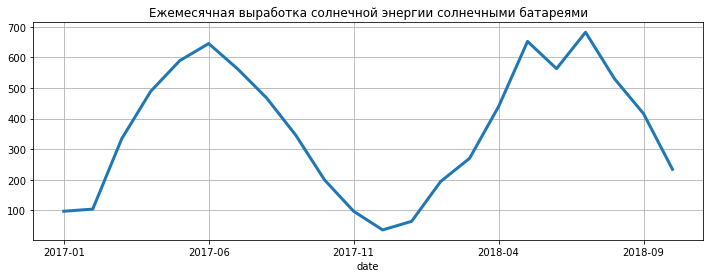

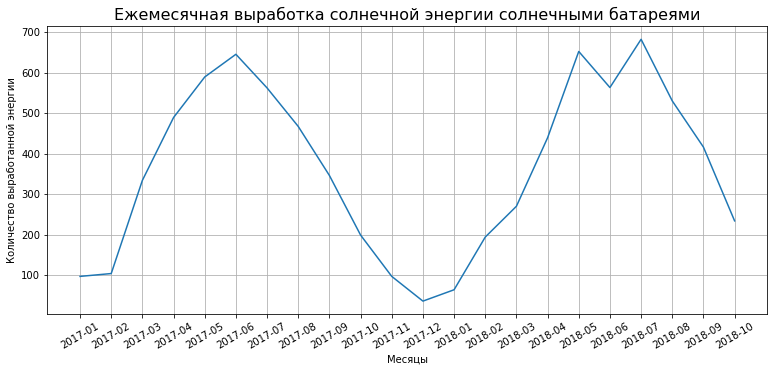

In [56]:
month_power_df.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежемесячная выработка солнечной энергии солнечными батареями',
    grid = True,
    lw=3
); # Работал с типом данных period[м] без преобразования к str

fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(month_power_df)
axes.set_title('Ежемесячная выработка солнечной энергии солнечными батареями', fontsize=16)
axes.set_xlabel('Месяцы')
axes.set_ylabel('Количество выработанной энергии')
axes.xaxis.set_tick_params(rotation=30)
axes.grid();

Анализируя линейный график временного ряда ежемесячной выработки солнечной энергии солнечными батареями, можно сделать вывод, что подъем отмечается преимущественно в весенний сезон (в среднем для двух лет), хотя в 2017 году подъем отмечается еще в июне, летнем месяце. Что касается 2018 года, то подъем наблюдается с зимнего сезона по весенний включительно. Также по графику виден небольшой скачок прироста энергии в июле. 
В свою очередь спад выработки энергии регистрируется в летний и осенний сезоны. В 2017 году спад наблюдается с июля по декабрь. В 2018 году выработка энергии начинает падать с августа, причем краткосрочное падение отмечается также в месяце июне.
Данные результаты объясняются особенностями природно-климатической зоны, в которой расположенны солнечные батареи.